<a href="https://colab.research.google.com/github/SebastianWikt/DS4002-P2/blob/main/Scripts/Project_2_running_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing necessary libraries and loading the data

In [2]:
pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.6 MB/s eta 0:00:00


In [107]:
! git clone https://github.com/SebastianWikt/DS4002-P2.git

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a sample DataFrame
df = pd.read_csv('/content/DS4002-P2/Data/IDB_10-21-2024.csv')


fatal: destination path 'DS4002-P2' already exists and is not an empty directory.


In [108]:
df.replace(',','', regex=True, inplace=True)
df.head(15)

,Name,Region,GENC,Year,Population,Population Density (People per Sq. Km.),Total Fertility Rate,Crude Birth Rate,"Life Expectancy at Birth, Both Sexes",Crude Death Rate,Net Migration Rate,"Net international migrants, both sexes"
0,-> 2000,NaN,NaN,NaN,--,--,--,--,--,--,--,--
1,Brazil,2000Brazil,BR,2000.0,175969492,21.1,2.39,21.0,69.5,6.4,0.0,4445
2,China,2000China,CN,2000.0,1271503410,136.3,1.56,12.8,71.7,6.4,-0.3,-329999
3,Congo (Kinshasa),2000Congo (Kinshasa),CD,2000.0,52921779,23.3,6.76,45.4,52.3,13.6,-1.2,-65402
4,Egypt,2000Egypt,EG,2000.0,65549954,65.8,3.46,27.1,67.6,6.0,-0.4,-23511
5,Ethiopia,2000Ethiopia,ET,2000.0,62891069,57.4,5.44,39.1,53.0,12.8,-1.3,-81827
6,India,2000India,IN,2000.0,1049692922,353.1,3.27,26.0,62.8,8.5,-0.1,-126593
7,Indonesia,2000Indonesia,ID,2000.0,214090575,118.2,2.61,22.6,68.0,6.4,-1.6,-338270
8,Japan,2000Japan,JP,2000.0,126771901,347.8,1.37,9.6,81.0,7.7,0.3,37859
9,Mexico,2000Mexico,MX,2000.0,99775434,51.3,2.69,23.6,73.2,4.8,-5.2,-517473


# Finding change points in the population data for India, China, Brazil, Egypt and Mexico

### Pick any two variables to assign as x and y for the correlation calculation


<ipython-input-113-5a074dea2bdd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['rolling_corr'] = df_india[x].rolling(window_size).corr(df_india[y])


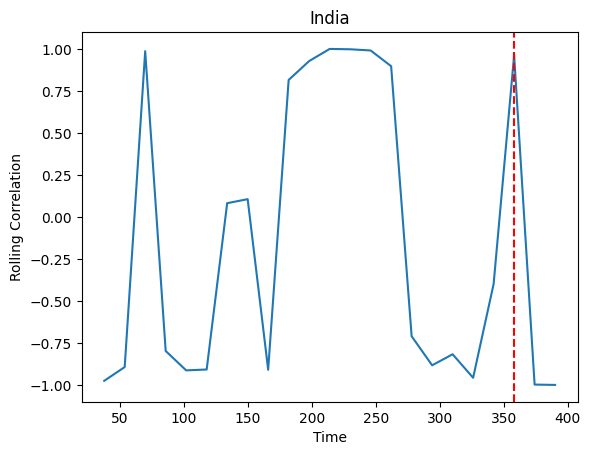

In [113]:
from ruptures import Pelt

df_india = df.loc[df['Name'] == 'India']

x = 'Net international migrants, both sexes'
y = 'Life Expectancy at Birth, Both Sexes'

window_size = 3  # Adjust to the minimum value with no errors
df_india['rolling_corr'] = df_india[x].rolling(window_size).corr(df_india[y])

model = Pelt(model="rbf").fit(df_india['rolling_corr'].dropna().values)
change_points = model.predict(pen=10)  # Adjust penalty as needed

plt.plot(df_india.index, df_india['rolling_corr'])
for cp in change_points:
    plt.axvline(x=df_india.index[cp-1], color='red', linestyle='--')
plt.title('India')
plt.xlabel('Time')
plt.ylabel('Rolling Correlation')
plt.show()

<ipython-input-118-ba19efcf87fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['rolling_corr'] = df_china[x].rolling(window_size).corr(df_china[y])


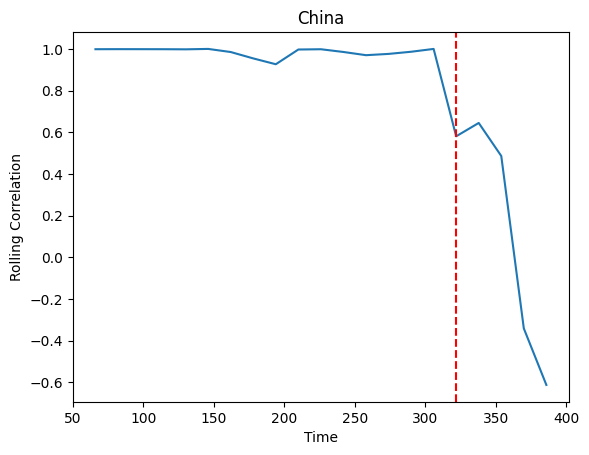

In [118]:
df_china = df.loc[df['Name'] == 'China']

x = 'Net international migrants, both sexes'
y = 'Life Expectancy at Birth, Both Sexes'

window_size = 5  # Adjust to the minimum value with no errors
df_china['rolling_corr'] = df_china[x].rolling(window_size).corr(df_china[y])

model = Pelt(model="rbf").fit(df_china['rolling_corr'].dropna().values)
change_points = model.predict(pen=10)  # Adjust penalty as needed

plt.plot(df_china.index, df_china['rolling_corr'])
for cp in change_points:
    plt.axvline(x=df_china.index[cp-1], color='red', linestyle='--')
plt.title('China')
plt.xlabel('Time')
plt.ylabel('Rolling Correlation')
plt.show()

<ipython-input-120-3c4df7be2b72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['rolling_corr'] = df_brazil[x].rolling(window_size).corr(df_brazil[y])


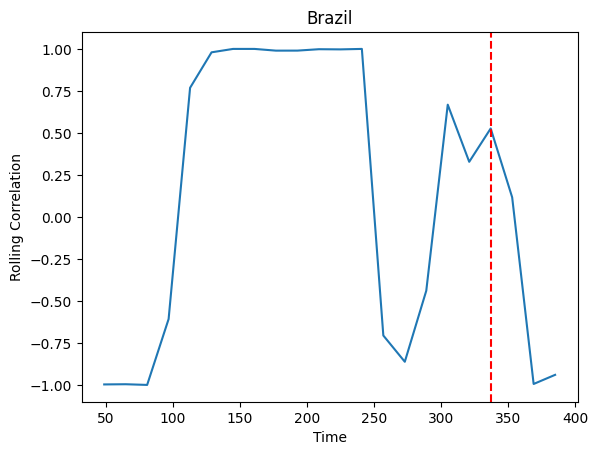

In [120]:
df_brazil = df.loc[df['Name'] == 'Brazil']

x = 'Net international migrants, both sexes'
y = 'Life Expectancy at Birth, Both Sexes'

window_size = 4  # Adjust to the minimum value with no errors
df_brazil['rolling_corr'] = df_brazil[x].rolling(window_size).corr(df_brazil[y])

model = Pelt(model="rbf").fit(df_brazil['rolling_corr'].dropna().values)
change_points = model.predict(pen=10)  # Adjust penalty as needed

plt.plot(df_brazil.index, df_brazil['rolling_corr'])
for cp in change_points:
    plt.axvline(x=df_brazil.index[cp-1], color='red', linestyle='--')
plt.title('Brazil')
plt.xlabel('Time')
plt.ylabel('Rolling Correlation')
plt.show()

<ipython-input-122-6e3619da0e73>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egypt['rolling_corr'] = df_egypt[x].rolling(window_size).corr(df_egypt[y])


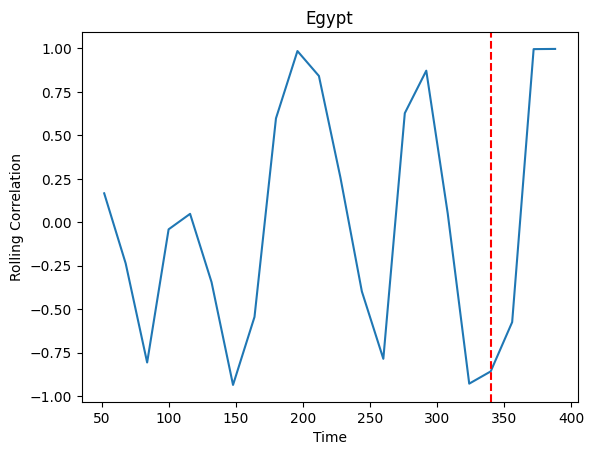

In [122]:
df_egypt = df.loc[df['Name'] == 'Egypt']

x = 'Net international migrants, both sexes'
y = 'Life Expectancy at Birth, Both Sexes'

window_size = 4  # Adjust to the minimum value with no errors
df_egypt['rolling_corr'] = df_egypt[x].rolling(window_size).corr(df_egypt[y])

model = Pelt(model="rbf").fit(df_egypt['rolling_corr'].dropna().values)
change_points = model.predict(pen=10)  # Adjust penalty as needed

plt.plot(df_egypt.index, df_egypt['rolling_corr'])
for cp in change_points:
    plt.axvline(x=df_egypt.index[cp-1], color='red', linestyle='--')
plt.title('Egypt')
plt.xlabel('Time')
plt.ylabel('Rolling Correlation')
plt.show()

<ipython-input-123-492c9a0d7768>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mexico['rolling_corr'] = df_mexico[x].rolling(window_size).corr(df_mexico[y])


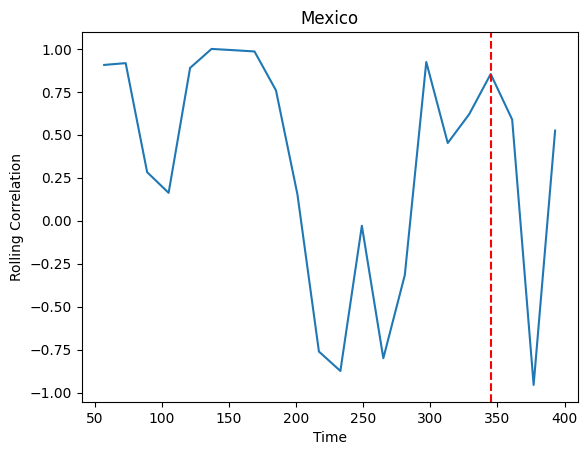

In [123]:
df_mexico = df.loc[df['Name'] == 'Mexico']

x = 'Net international migrants, both sexes'
y = 'Life Expectancy at Birth, Both Sexes'

window_size = 4  # Adjust to the minimum value with no errors
df_mexico['rolling_corr'] = df_mexico[x].rolling(window_size).corr(df_mexico[y])

model = Pelt(model="rbf").fit(df_mexico['rolling_corr'].dropna().values)
change_points = model.predict(pen=10)  # Adjust penalty as needed

plt.plot(df_mexico.index, df_mexico['rolling_corr'])
for cp in change_points:
    plt.axvline(x=df_mexico.index[cp-1], color='red', linestyle='--')
plt.title('Mexico')
plt.xlabel('Time')
plt.ylabel('Rolling Correlation')
plt.show()